In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("default")
from scipy.special import erf

In [2]:
def RK2_in_TOV_class(f, x0, t0, te, N):
        h = (te - t0) / N
        times = np.arange(t0, te + h, h)
        solution = []
        x = x0
        
        for t in times:
            solution.append(np.array(x).T)
            k1 = h * f(t, x)
            k2 = h * f(t + 0.5 * h, x + 0.5 * k1)
            x += k2
        
        solution = np.asarray(solution, dtype=np.float64).T
        
        return times, solution

def RK2_Heun(f, x0, t0, te, N):
        h = (te - t0) / N
        times = np.arange(t0, te + h, h)
        solution = []
        x = x0
        
        for t in times:
            solution.append(np.array(x).T)
            k1 = f(t, x)
            k2 = f(t + h, x + k1 * h)
            x += h * (k1 + k2) * 0.5
        
        solution = np.asarray(solution, dtype=np.float64).T
        
        return times, solution

In [8]:
# def dydx(x, y):
#     return y * np.exp(-x**2) - y
# def exact_sol(x):
#     return np.exp(-x + 0.5 * np.sqrt(np.pi) * erf(x))


# def dydx(x, y):
#     return -y
# def exact_sol(x):
#     return np.exp(-x)

# def dydx(x, y):
#     return -y * x
# def exact_sol(x):
#     return np.exp(-x ** 2 / 2)

def dydx(x, y):
    return -y - y**2
def exact_sol(x):
    return 1 / (-1 + 2 * np.exp(x))

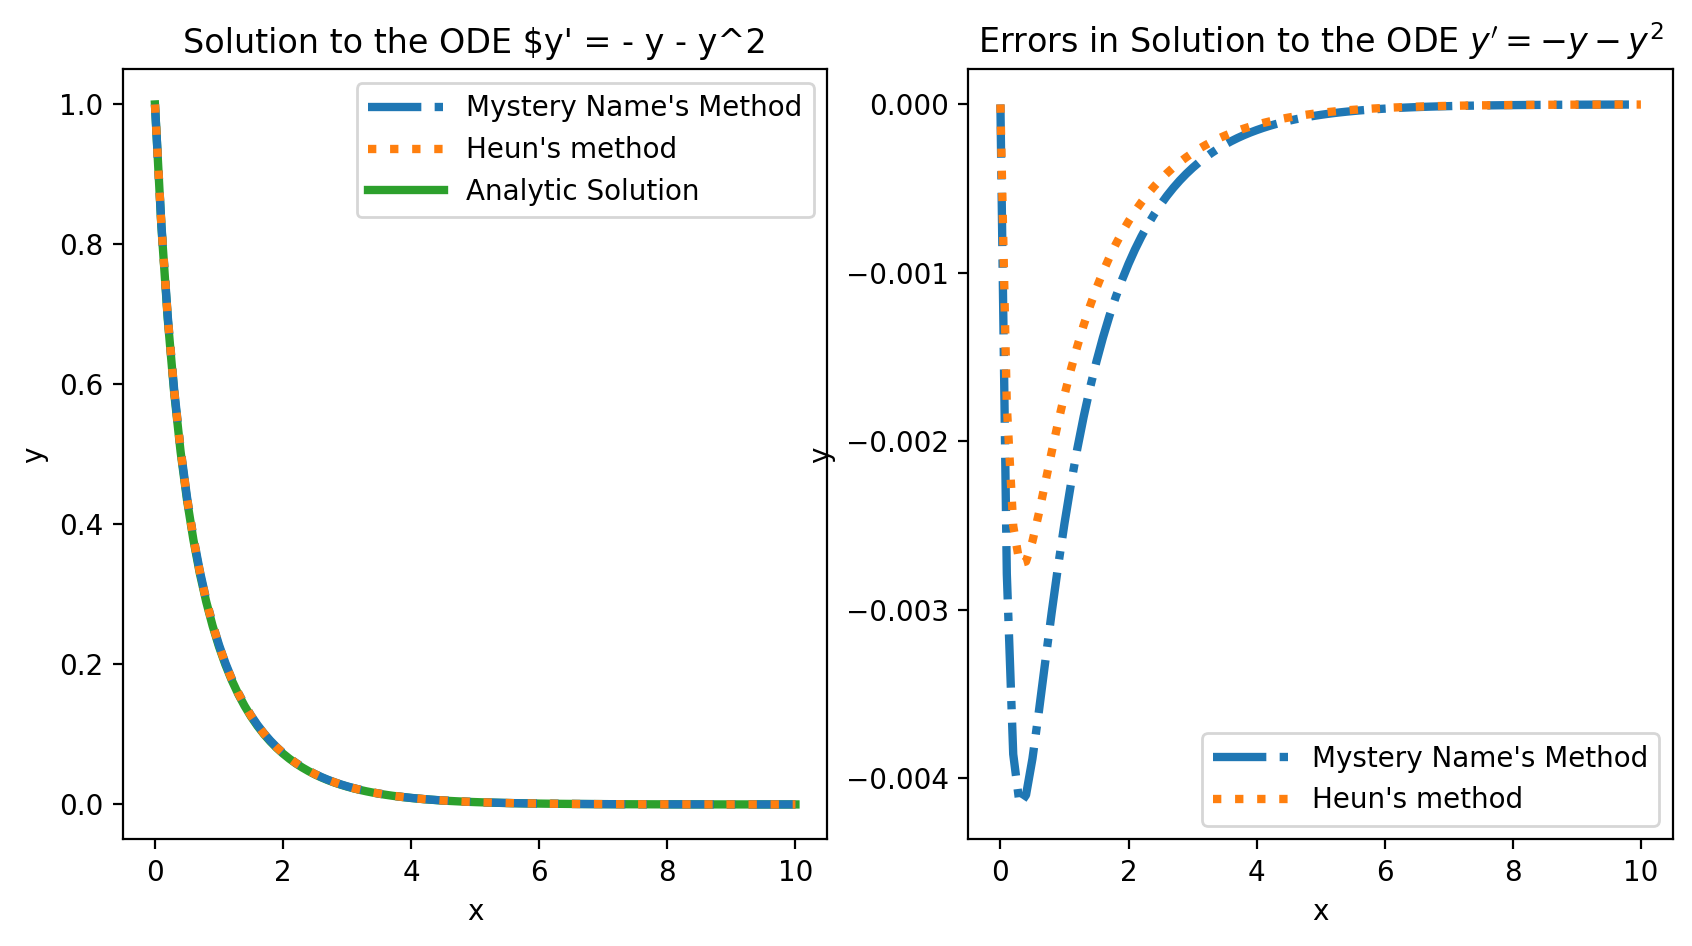

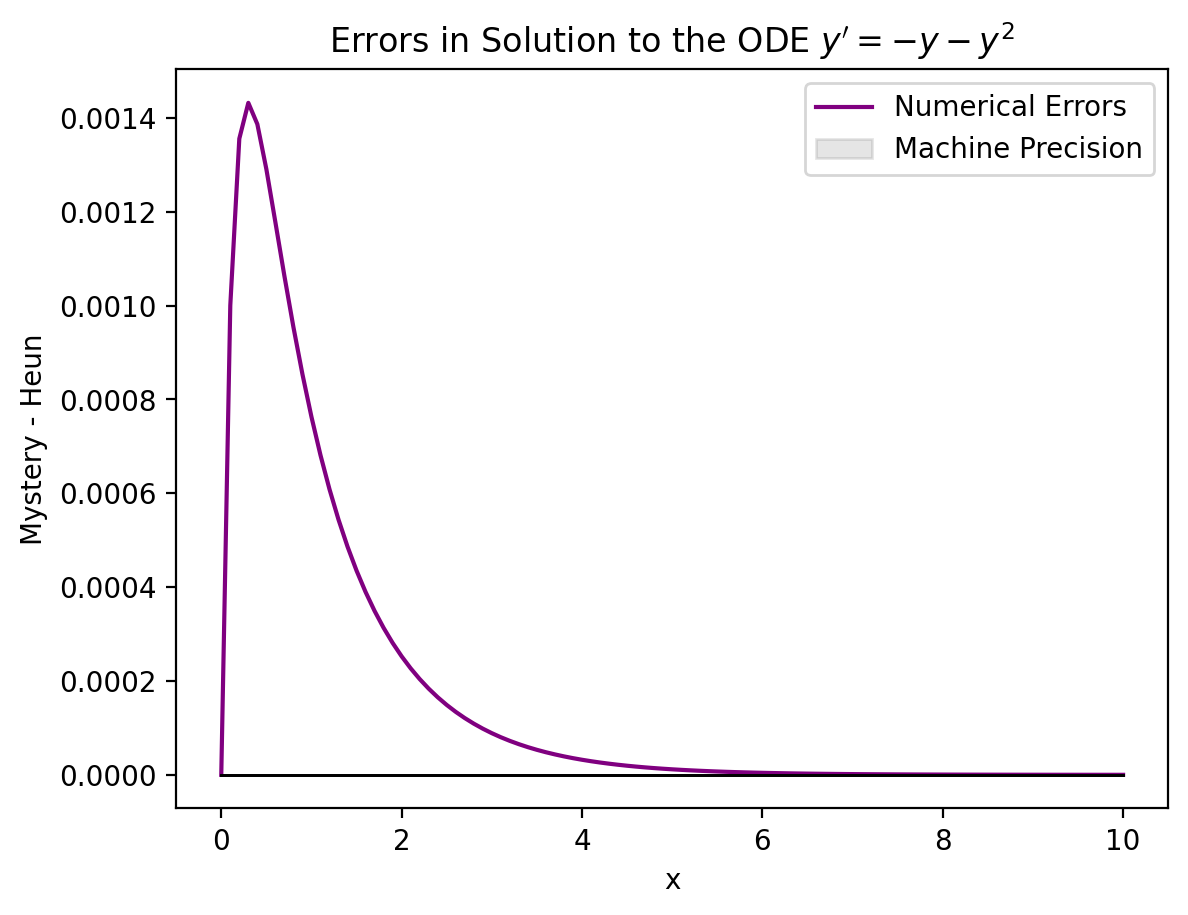

In [4]:
TOV_class_sol = RK2_in_TOV_class(dydx, 1, 0, 10, 100)
Heun_sol = RK2_Heun(dydx, 1, 0, 10, 100)

x = Heun_sol[0]

# print("TOV_class's implementation error list:")
# print(exact_sol(x) - TOV_class_sol[1])
# print("Heun's method error list:")
# print(exact_sol(x) - Heun_sol[1])


fig, ax = plt.subplots(1, 2, dpi=200, figsize=(10, 5))
ax[0].set_title(r"Solution to the ODE $y' = - y - y^2")
ax[0].plot(x, TOV_class_sol[1], linestyle="-.", linewidth=3, label="Mystery Name's Method", zorder=2)
ax[0].plot(x, Heun_sol[1], linestyle=":", linewidth=3, label="Heun's method", zorder=2)
ax[0].plot(x, exact_sol(x), linewidth=3, label="Analytic Solution", zorder=1)
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[0].legend(handlelength=2.75)


ax[1].set_title(r"Errors in Solution to the ODE $y' = - y - y^2$")
ax[1].plot(x, exact_sol(x) - TOV_class_sol[1], linestyle="-.", linewidth=3, label="Mystery Name's Method")
ax[1].plot(x, exact_sol(x) - Heun_sol[1], linestyle=":", linewidth=3, label="Heun's method")
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
ax[1].legend(handlelength=2.75)
plt.show()


plt.figure(dpi=200)
plt.title(r"Errors in Solution to the ODE $y' = - y - y^2$")
plt.plot(x, TOV_class_sol[1] - Heun_sol[1], color="purple", label="Numerical Errors")
plt.plot([x[0], x[-1]], [-2**-52, -2**-52], color="black", linewidth=1)
plt.plot([x[0], x[-1]], [2**-52, 2**-52], color="black", linewidth=1)
plt.fill_between([x[0], x[-1]], [-2**-52, -2**-52], [2**-52, 2**-52], alpha=0.1, color="black", label="Machine Precision")
plt.xlabel("x")
plt.ylabel("Mystery - Heun")
plt.legend()
plt.show()

In [6]:
%timeit -n 1000 RK2_in_TOV_class(dydx, 1, 0, 10, 100)
%timeit -n 1000 RK2_Heun(dydx, 1, 0, 10, 100)

58 μs ± 5.01 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
54.8 μs ± 697 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
